### Denoising Filters
1. Total variation filter: based on the principal that signals with noise have high total variation
2. Bilateral filter: good at preserving edges
3. Wavelet denoising filter: good at preserving image quality

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float, color, io
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

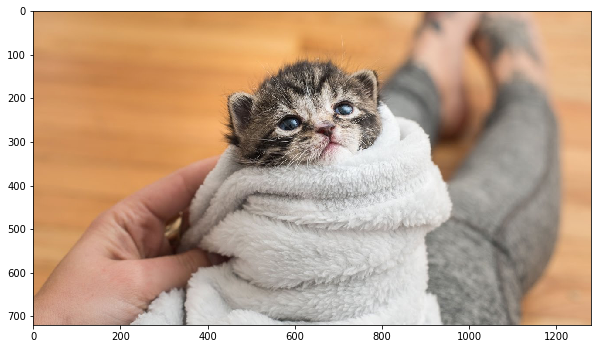

In [2]:
kitten = img_as_float(io.imread("./images/kitten.jpeg"))

plt.figure(figsize=(10,8))
plt.imshow(kitten)

#### Add some random noise

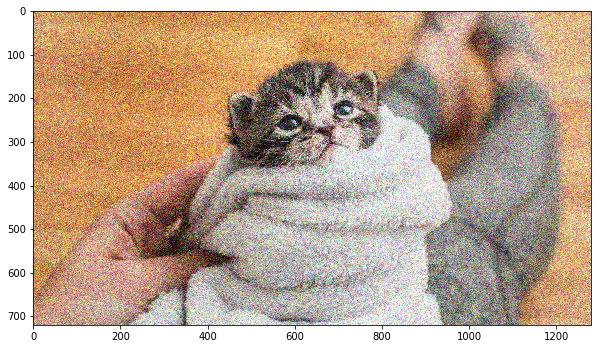

In [3]:
sigma = 0.155

noisy_kitten = random_noise(kitten,var=sigma**2)

plt.figure(figsize=(10,8))
plt.imshow(noisy_kitten)

### Estimate the standard deviation of the noise in the image

In [5]:
sigma_est = estimate_sigma(noisy_kitten, multichannel=True, average_sigmas = True)
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

Estimated Gaussian noise standard deviation = 0.14694015008647743


### Denoise using total variation

In [7]:
denoise_tv_1 = denoise_tv_chambolle(noisy_kitten,
                                   weight = 0.1, # the greater the weight, the more denoising
                                   multichannel=True)

/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


In [8]:
denoise_tv_2 = denoise_tv_chambolle(noisy_kitten,
                                   weight = 0.2, # the greater the weight, the more denoising
                                   multichannel=True)

/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


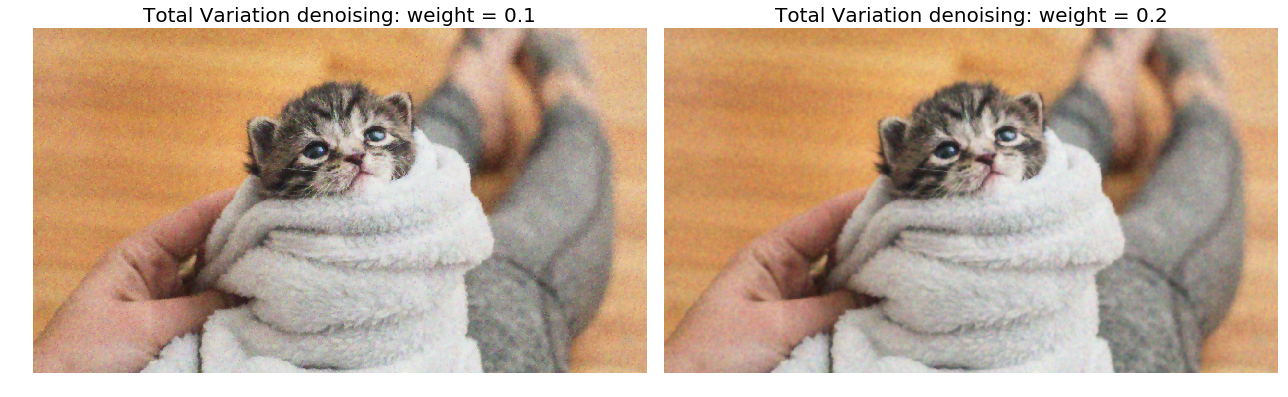

In [9]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)

ax[0].imshow(denoise_tv_1)
ax[0].axis("off")
ax[0].set_title("Total Variation denoising: weight = 0.1",fontsize=20)

ax[1].imshow(denoise_tv_2)
ax[1].axis("off")
ax[1].set_title("Total Variation denoising: weight = 0.2",fontsize=20)

fig.tight_layout()
plt.show()

### Bilaterial filter

In [4]:
denoise_bi_1 = denoise_bilateral(noisy_kitten,
                                sigma_color = 0.05,
                                sigma_spatial=15,
                                multichannel=True)

In [ ]:
denoise_bi_2 = denoise_bilateral(noisy_kitten,
                                sigma_color = 0.1,
                                sigma_spatial=15,
                                multichannel=True)

In [ ]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)

ax[0].imshow(denoise_bi_1)
ax[0].axis("off")
ax[0].set_title("Bilateral denoising: sigma_color = 0.05",fontsize=20)

ax[1].imshow(denoise_bi_2)
ax[1].axis("off")
ax[1].set_title("Bilateral denoising: sigma_color=0.1",fontsize=20)

fig.tight_layout()
plt.show()

### Wavelet denoising

In [9]:
denoise_wave_1 = denoise_wavelet(noisy_kitten,
                                mode="soft",
                                multichannel=True,
                                convert2ycbcr=True) # this is true becase wavelet transform usually works better in YCbCr than rgb space


/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return pywt.waverecn(denoised_coeffs, wavelet)[original_extent]


In [10]:
denoise_wave_2 = denoise_wavelet(noisy_kitten,
                                mode="soft",
                                multichannel=True,
                                convert2ycbcr=False) 

/anaconda3/lib/python3.7/site-packages/skimage/restoration/_denoise.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return pywt.waverecn(denoised_coeffs, wavelet)[original_extent]


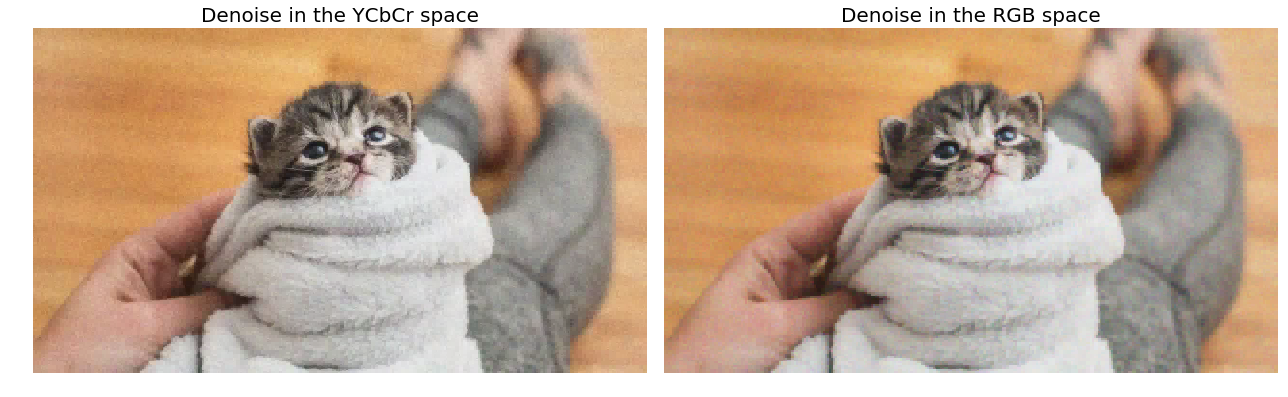

In [11]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)

ax[0].imshow(denoise_wave_1)
ax[0].axis("off")
ax[0].set_title("Denoise in the YCbCr space",fontsize=20)
# note that wavelet works better in YCbCr space (i.e. image is more crisp)

ax[1].imshow(denoise_wave_2)
ax[1].axis("off")
ax[1].set_title("Denoise in the RGB space",fontsize=20)


fig.tight_layout()
plt.show()